In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.morphology import disk
from skimage.filters.rank import equalize
from skimage.filters.rank import mean_bilateral
from skimage.filters.rank import enhance_contrast
from skimage.filters.rank import otsu
from skimage.filters import threshold_local
from skimage.exposure import equalize_hist

In [61]:
im1 = io.imread("classic.tif")
im1 = np.array(im1[3])

im2 = io.imread("axon in cerebellum.tif")
im2 = np.array(im2[2])

image = np.concatenate([im1, im2])

In [62]:
def normalize_pixels(i):
    i = 256*(i/np.amax(i))
    return i.astype(int)

In [63]:
image_equalized = equalize(image, disk(50))
image_glob_equalized = equalize_hist(image)
bilat_image = mean_bilateral(image, disk(50), s0 = 5, s1 = 5)
enh = enhance_contrast(image, disk(10))

In [64]:
image = normalize_pixels(image)
image_equalized = normalize_pixels(image_equalized)
image_glob_equalized = normalize_pixels(image_glob_equalized)
bilat_image = normalize_pixels(bilat_image)
enh = normalize_pixels(enh)

In [44]:
%matplotlib inline

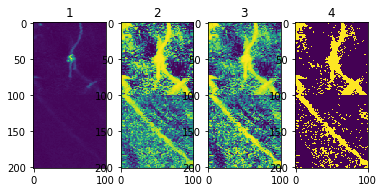

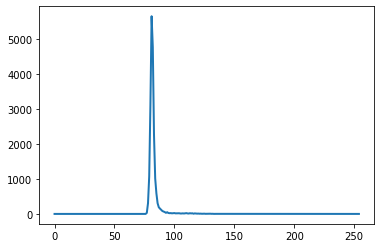

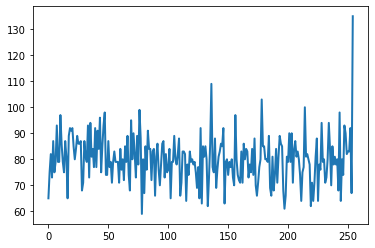

In [51]:
plt.figure(1)
plt.subplot(141)
plt.imshow(image)
plt.title("1")

plt.subplot(142)
plt.imshow(image_glob_equalized)
plt.title("2")

plt.subplot(143)
plt.imshow(image_equalized)
plt.title("3")

plt.subplot(144)
plt.imshow(image_equalized >= 200)
plt.title("4")




hist = np.histogram(image, bins=np.arange(0, 256))

plt.figure(2)
plt.plot(hist[1][:-1], hist[0], lw = 2)


hist = np.histogram(image_equalized, bins=np.arange(0, 256))

plt.figure(3)
plt.plot(hist[1][:-1], hist[0], lw = 2)


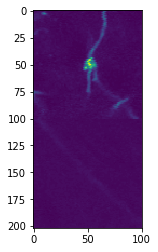

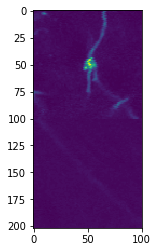

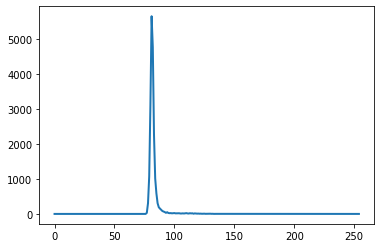

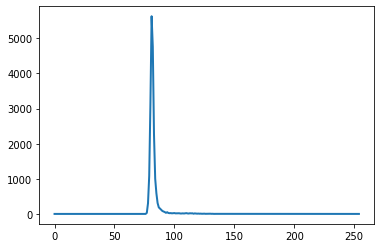

In [53]:
plt.figure(1)
plt.imshow(image)

plt.figure(2)
plt.imshow(bilat_image)

hist = np.histogram(image, bins=np.arange(0, 256))

plt.figure(3)
plt.plot(hist[1][:-1], hist[0], lw = 2)


hist = np.histogram(bilat_image, bins=np.arange(0, 256))

plt.figure(4)
plt.plot(hist[1][:-1], hist[0], lw = 2)


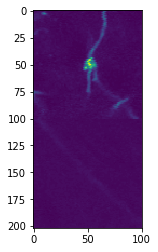

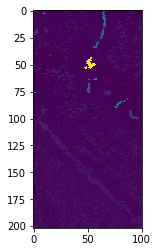

In [65]:
plt.figure(1)
plt.imshow(image)

plt.figure(2)
plt.imshow(enh)

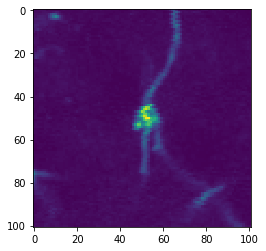

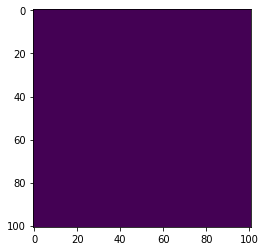

In [218]:
a = otsu(image, disk(5))

plt.figure(1)
plt.imshow(image)

plt.figure(2)
plt.imshow(image >= a)

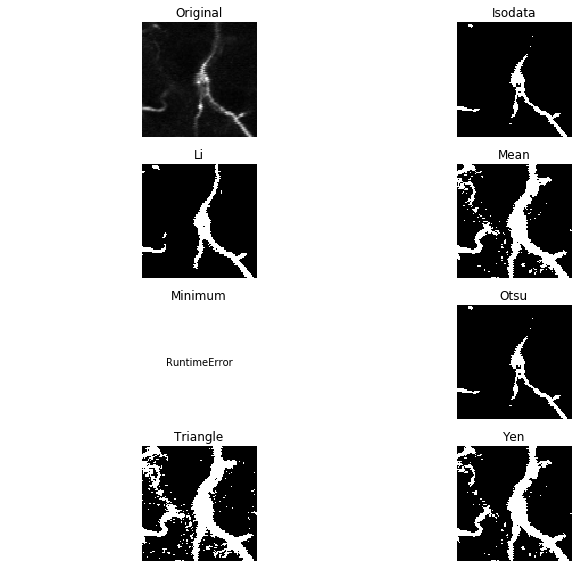

In [130]:
from skimage.filters import try_all_threshold

fix, ax = try_all_threshold(image, figsize=(10,8), verbose = False)
plt.show()